In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
from scipy.integrate import odeint
from math import pi
from pysindy.differentiation import FiniteDifference
fd = FiniteDifference(order=2, d=1)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import glob
from sklearn.metrics import mean_absolute_error

In [2]:
t = np.linspace(0,20*pi,1000)
x = t*np.sin(t)

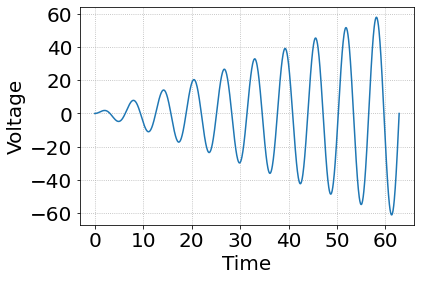

In [3]:
plt.grid(linestyle='dotted')
plt.plot(t,x)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Voltage', fontsize = 20)
#plt.legend(['Actual function' , 'Learned function', 'Training Data'], prop={'size': 16})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("Results/test1_input.jpg", dpi = 300, bbox_inches='tight')

In [4]:
dx = fd._differentiate(x, t)

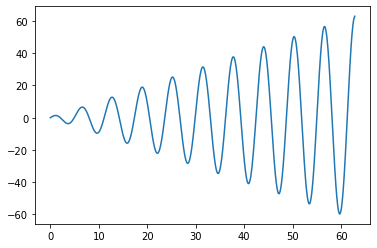

In [5]:
plt.plot(t,dx)

In [6]:
mdx = np.abs(dx)

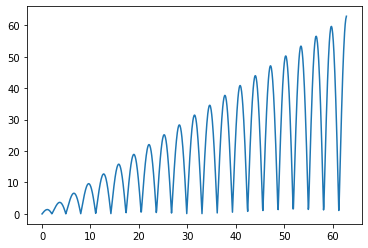

In [7]:
plt.plot(t, mdx)

In [8]:
def model(y, t):
    dydt = 1*np.abs(t*np.cos(t) + np.sin(t))*t*np.sin(t) - 0.25 * np.abs(t*np.cos(t) + np.sin(t))*y + 20*(t*np.cos(t) + np.sin(t))
    return dydt

In [9]:
y0 = 0
y = odeint(model, y0, t)

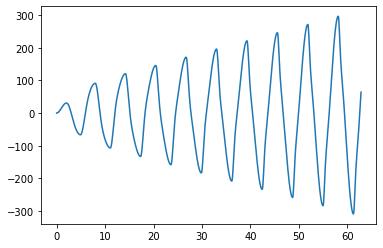

In [10]:
plt.plot(t,y)

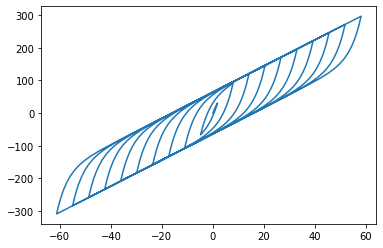

In [11]:
plt.plot(x, y)

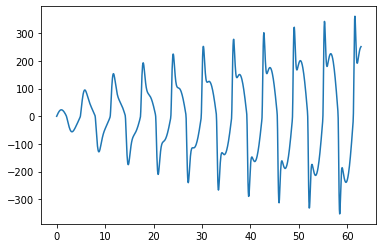

In [12]:
dy = fd._differentiate(y, t)
plt.plot(t, dy)

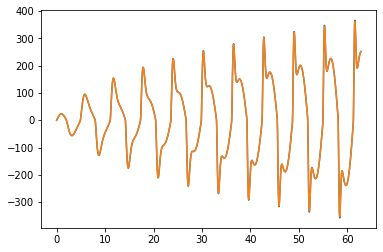

In [13]:
y = y.reshape(-1,)
dy = dy.reshape(-1,)
t1 = x*mdx
t2 = mdx*y
t3 = dx
terms = t1-0.25*t2+20*t3
plt.plot(t,terms)
plt.plot(t, dy)

In [14]:
X = np.stack((y, x, dx, mdx), axis=-1)

In [15]:
model = ps.SINDy()
model.fit(X,t)
model.print()

(x0)' = 19.846 x2 + -0.247 x0 x3 + 0.990 x1 x3
(x1)' = 1.000 x2
(x2)' = -0.999 x1
(x3)' = 1.003 1


In [16]:
c1 = 0.99
c2 = -0.247
c3 = 19.846
def test_model(y, t):
    dydt = c1*np.abs(t*np.cos(t) + np.sin(t))*t*np.sin(t) + c2 * np.abs(t*np.cos(t) + np.sin(t))*y + c3*(t*np.cos(t) + np.sin(t))
    return dydt

In [17]:
ytest_0 = 0
y_test = odeint(test_model, ytest_0, t)

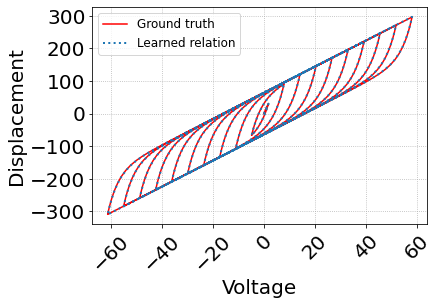

In [23]:
plt.grid(linestyle='dotted')
plt.plot(x, y, 'r')
plt.plot(x, y_test, linewidth=2, linestyle=':')
plt.xlabel('Voltage', fontsize = 20)
plt.ylabel('Displacement', fontsize = 20)
plt.legend(['Ground truth' , 'Learned relation'], prop={'size': 12})
plt.xticks(fontsize=20, rotation='45')
plt.yticks(fontsize=20)
plt.savefig("Results/pic1.jpg", dpi = 1000, bbox_inches='tight')

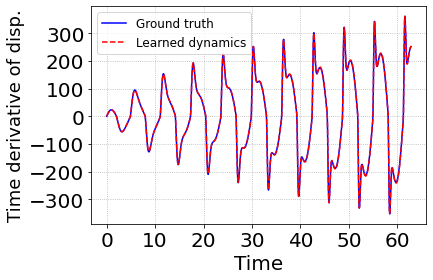

In [19]:
test = c1*t1+c2*t2+c3*t3
plt.plot(t,dy, 'b')
plt.plot(t,test, '--r')
plt.grid(linestyle='dotted')
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Time derivative of disp.', fontsize = 18)
plt.legend(['Ground truth' , 'Learned dynamics'], prop={'size': 12})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("Results/test1_Output.jpg", dpi = 300, bbox_inches='tight')

In [20]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test: ", relative_error_test*100, "%")

Relative Error Test:  0.0008392960363095107 %


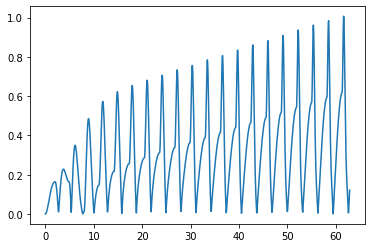

In [21]:
err_t = np.abs(y-y_test)
plt.plot(t, err_t)